## Lab Exercise_4 - PANDAS - DATA ANALYSIS

### About the dataset (Customer Tip Data)

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

Attribute Information:

**total_bill:** Total bill (cost of the meal), including tax, in US dollars

**tip:** Tip in US dollars

**sex:** Sex of person paying for the meal

**smoker:** There is a smoker in a group or not

**day:** Day on which the order is served

**time:** Time of the order

**size:** Size of the group

**Import the required libraries**

In [184]:
# type your code here
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#### Load the customer tip dataset and print the first five observations

In [260]:
# type your code here
cust_tip=pd.read_csv("customer_tip.csv")
cust_tip.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Let's begin with some hands-on practice exercises

### 1. Print the column names of categorical and numerical variables in the data


In [24]:
# type your code here
print("The name of all columns are: ",cust_tip.columns)

The name of all columns are:  Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


### 2. Print the average value of Total bill amount and tips

In [31]:
# type your code
print("The average of Total Bill: ",cust_tip['total_bill'].mean())
print("The average of Tip       : ",cust_tip['tip'].mean())      

The average of Total Bill:  19.785942622950824
The average of Tip       :  2.9982786885245902


### 3. Compute the average bill amount for each day


In [53]:
# type your code here
print("Day wise average bill amout")
cust_tip.groupby(['day'])['total_bill'].mean()

Day wise average bill amout


day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

### 4. Which gender is more generous in giving the tip?</b>


In [274]:
if (((cust_tip[cust_tip['sex']=="Male"]['tip']).mean())>((cust_tip[cust_tip['sex']=="Female"]['tip']).mean())):
    print("Male are more generous tippers")
else:
    print("Female are more generous tippers")
print("\nGrouping Gender based on average of  tips and in desending order: ")
(cust_tip.groupby(['sex'])['tip'].mean()).sort_values(ascending=False)

Male are more generous tippers

Grouping Gender based on average of  tips and in desending order: 


sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

### 5. According to the data, were there more customers for dinner or lunch? </b>


In [150]:
# type your code here
d=(cust_tip["time"]=="Dinner").sum()
l=(cust_tip["time"]=="Lunch").sum()
if l>d:
    print("More Customers visited for Lunch compared to Dinner")
else:
    print("More Customers visited for Dinner compared to dinner")
cust_tip['time'].value_counts()

More Customers visited for Dinner compared to dinner


Dinner    176
Lunch      68
Name: time, dtype: int64

### 6. comment on the variable 'tip' based on its measure of dispersion 

In [157]:
# type your code here
cust_tip.head(5)
print("The Descending arrangement of tip grouped by size of Dispersion")
print((cust_tip.groupby(["size"])['tip'].mean()).sort_values(ascending=False))
print("\nThe arrangement suggests the TIP increases with the portion size")

The Descending arrangement of tip grouped by size of Dispersion
size
6    5.225000
4    4.135405
5    4.028000
3    3.393158
2    2.582308
1    1.437500
Name: tip, dtype: float64

The arrangement suggests the TIP increases with the portion size


### 7. Plot the distribution of bill amount and tip and comment about its normality

(<seaborn.axisgrid.JointGrid at 0x1c17f629670>,
 <AxesSubplot:xlabel='Count', ylabel='tip'>)

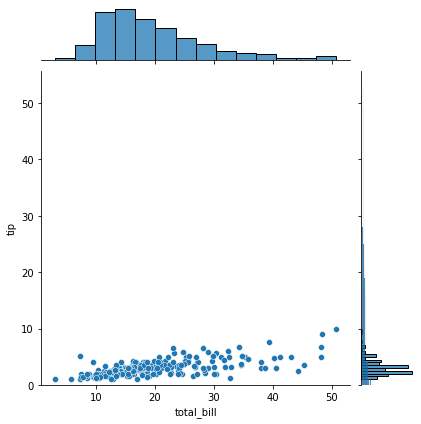

In [160]:
# type your code here
#plt.hist(cust_tip[["total_bill"]],20)
#plt.hist(cust_tip[["tip"]],20)
#plt.show(sns.histplot(cust_tip[["total_bill"]],kde=True,common_norm=False,))
#plt.show(sns.histplot(cust_tip[["tip"]],kde=True,common_norm=False,color='yellow'))
sns.jointplot(x="total_bill",y="tip",data=cust_tip), sns.histplot(x="tip",data=cust_tip)

### 8. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot


The Variable "total_bill" is skewed and the type is possitive Skewed


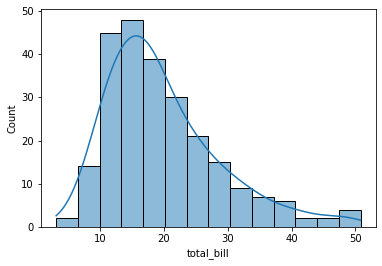

In [172]:
# type your code here
sns.histplot(x="total_bill",data=cust_tip,kde=True)
print("""The Variable "total_bill" is skewed and the type is possitive Skewed""")

### 9. Analyze the realation between bill_amount and tips

The trend indicates the data is skewed possitively.
The Tip is directly proportional to the bill amount.


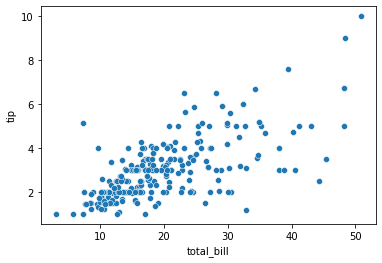

In [182]:
sns.scatterplot(x="total_bill",y="tip",data=cust_tip)
print("The trend indicates the data is skewed possitively.\nThe Tip is directly proportional to the bill amount.")

### 10. Find the covaraiance and correlation between bill_amount and tips. Infer the results

The correlation of total bill and tip is 0.6757341092113641 And Covarience of the same is 8.323501629224854
The possitive covarience and correlation indicates the tip changes along with each other or both the variables changes in same direction


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

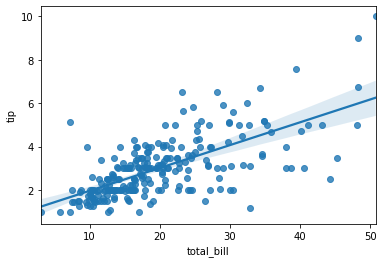

In [221]:
print("The correlation of total bill and tip is",(cust_tip["total_bill"].corr(cust_tip["tip"],)),"And Covarience of the same is", (cust_tip["total_bill"].cov(cust_tip["tip"])))
print("The possitive covarience and correlation indicates the tip changes along with each other or both the variables changes in same direction")
sns.regplot(x="total_bill",y="tip",data=cust_tip)

### 11. Analyze the realtion between bill_amount, tips and sex

The trend indicates possitive correlation
Mean tips are almost same for Male and Female customers however Male average tip is slightly higher.


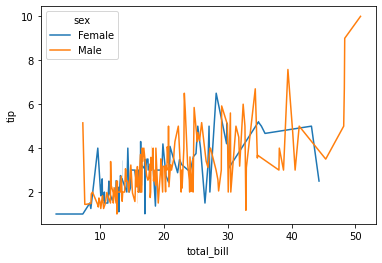

In [302]:
sns.lineplot(x="total_bill",y="tip",data=cust_tip, hue="sex")
cust_tip.groupby(["sex"])[["total_bill",'tip']].mean().sort_values('tip',ascending=False)
print("The trend indicates possitive correlation\nMean tips are almost same for Male and Female customers however Male average tip is slightly higher.")

### 12. Find the average number of customer for dinner and Lunch for each day 

size
day  time        
Fri  Dinner    12
     Lunch      7
Sat  Dinner    87
Sun  Dinner    76
Thur Dinner     1
     Lunch     61

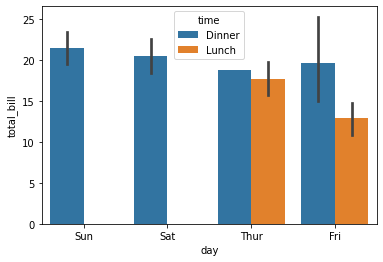

In [350]:
sns.barplot(x="day",y="total_bill",data=cust_tip,hue="time")
cust_tip.groupby(["day","time"])[["size"]].count()

### 13. Find the average bill-amount  for dinner and Lunch for each day

total_bill
day  time              
Fri  Dinner   19.663333
     Lunch    12.845714
Sat  Dinner   20.441379
Sun  Dinner   21.410000
Thur Dinner   18.780000
     Lunch    17.664754

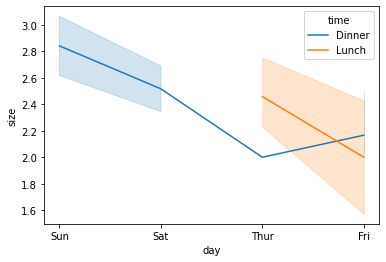

In [357]:
sns.lineplot(x="day",y="size",data=cust_tip,hue="time")
cust_tip.groupby(["day","time"])[["total_bill"]].mean()

### 14. Comment about the tips given by the smokers

Smokers are having higher tip value comparatively.


smoker
No     2.991854
Yes    3.008710
Name: tip, dtype: float64

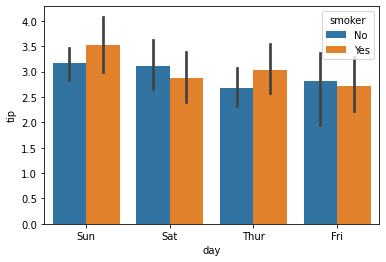

In [397]:
sns.barplot(x="day",y="tip",data=cust_tip,hue="smoker")
print("Smokers are having higher tip value comparatively.")
cust_tip.groupby(['smoker'])['tip'].mean()


### 15.Create a Pivot table with sex and smokers with their average tip amount

In [398]:
cust_tip.pivot_table(index="sex",columns="smoker",values="tip", aggfunc="mean")

smoker,No,Yes
sex,,
Female,2.773519,2.931515
Male,3.113402,3.051167


### 16. Compute the tips per person for each observation (tips/size)

In [402]:
cust_tip.groupby(["size"])['tip'].mean()

size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64